In [1]:
#Load the dataset from the below link
#https://www.kaggle.com/c/digit-recognizer/data
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the dataset i.e. in csv(Comma seperated value format)
d0=pd.read_csv('mnist_train.csv')

In [3]:
#check the head of read data
d0.head(5)
#First column contains label which will have values 0 1 2 3 4 5 6 7 8 9
#The remaining columns represent pixels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Save the labels in a seperate variable
#All the class labels will be in seperate variable l
l=d0['label']

In [5]:
#Drop the label column from the read dataset
#d will have dataset without the label column
d=d0.drop("label",axis=1)

In [6]:
#Check the head of d
#It will have one column less than the initial columns
d.head(5)
#For a d[i] value, its corresponding label will be l[i]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Check the shape of d and l
print(d.shape)
print(l.shape)
#d has 42000 datapoints and each datapoint is 784 dimensions
#l is just the label which is one column only but has 42000 rows

(42000, 784)
(42000,)


C:\Users\vedav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


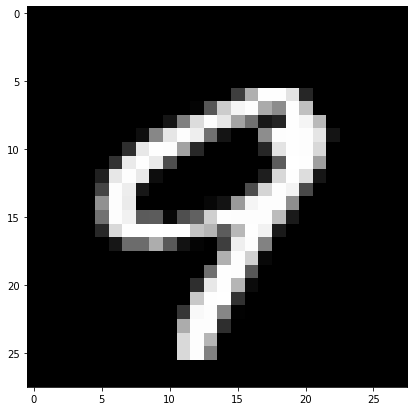

9


In [8]:
#plot a specific number
#we are choosing an index 100
#in the sense we are plotting an image located at d[100]
#Now we are plotting this image located at d[100] location
#that is having 784 pixel image
#We wil plot this and see if this is actually the label[100]
plt.figure(figsize=(7,7))
idx=100

#d.iloc[idx] means get the data at 100 row
#as_matrix() convert the above to matrix
#reshape(28,28) reshape the above to 28*28 matrix 
grid_data=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

#View the label[100]
print(l[idx])

# 2D Visualization using PCA without using scikit-Learn

In [9]:
#We reduce 784-D MNIST Datset to 2-D Dataset
#y={0,1,2,3,4,5,6,7,8,9}
#Instead of taking all the 42000 points we are taking only subset of points i.e. 15000

labels=l.head(15000)
data=d.head(15000)
print("the shape of sample data =",data.shape)

#All the 15000 images are in variable data
#all the corresponding 15000 class labels are in variable labels

the shape of sample data = (15000, 784)


In [10]:
#Data Preprocessing: Standardizing the data
#We take each column of data [(x-mean)/standard deviation]
#Doing this we ensure by doing the above that our data is standardized
#with mean zero and standard deviation equal to one
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [11]:
#Compute co-variance matrix which is A^T*A
#copy standardized_data to sample_data
sample_data=standardized_data

#A is 15000*784
#A^T will be 784*784
#Perform Matrix multiplication
covar_matrix=np.matmul(sample_data.T,sample_data)

#Shape of co-variance Matrix
print("The shape of covariance matrix =",covar_matrix.shape)

The shape of covariance matrix = (784, 784)


In [12]:
#Find out top 2 eigen vectors corresponding to top 2 eigen values
#Why??? to project on 2-D space

from scipy.linalg import eigh

#eigh function returns eigen values and corresponding eigen vectors
#parameter 'eigvals' is defined(low value to high value)
#eigh function will return the eigen values in ascending order
#following code generates only the top 2 (782 and 783) eigen values

values,vectors=eigh(covar_matrix,eigvals=(782,783))

#Check shape of eigen vectors
print("shape of eigen vectors = ",vectors.shape)

#convert the eigen vectors into (2,d) shape for easyness 
vectors=vectors.T


print("Updates shape of eigen vectors = ",vectors.shape)
#here the vectors[1] represent the eigen vector corresponding to 1st principal
#here the vectprs[0] represent the eigen vector corresponding 2nd principal
#our vectors is now 2*784

shape of eigen vectors =  (784, 2)
Updates shape of eigen vectors =  (2, 784)


In [13]:
#We need only top 2 eigen vectors because we want to project in 2-Dimensions
#We need top N eigenvectors in case we want to project in N-Dimensions

import matplotlib.pyplot as plt

#vectors shape is 2*784
#sample_data Transpose is 784*15000
new_coordinates=np.matmul(vectors,sample_data.T)

print("resultant new data points shape = ",vectors.shape,"X",sample_data.shape,"=",new_coordinates.shape)

resultant new data points shape =  (2, 784) X (15000, 784) = (2, 15000)


In [14]:
#to the new_coordinates we perform vstack
#Why? to add the corresponding labels
#Now, we append corresponding labels to 2-D projected data
new_coordinates=np.vstack((new_coordinates,labels)).T

#create a dataframe and name the columns
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\vedav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


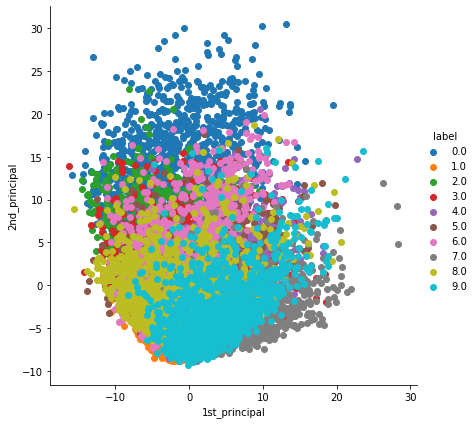

In [15]:
#plot 2-Dimensional data using Seaborn
import seaborn as sn
sn.FacetGrid(dataframe,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()
#This plot is for 15000 points only and not all the 42000 points
#we notice overlap for few labels
#784----->2-D is not a that super technique
#

# PCA using Scikit-Learn

In [16]:
#initializing PCA from sklearn
from sklearn import decomposition
pca=decomposition.PCA()

In [17]:
#Check shape of sample data
sample_data.shape

(15000, 784)

In [18]:
#The following performs everything --- covariance matrix, computing top eigen values,corresponding eigen vectors
#We need top 2 components i.e. top 2 eigen vectors
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

#pca_reduced will contain 2-D projections of sample_data
print("shape of pca_reduced_shape = ",pca_data.shape)

shape of pca_reduced_shape =  (15000, 2)


C:\Users\vedav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


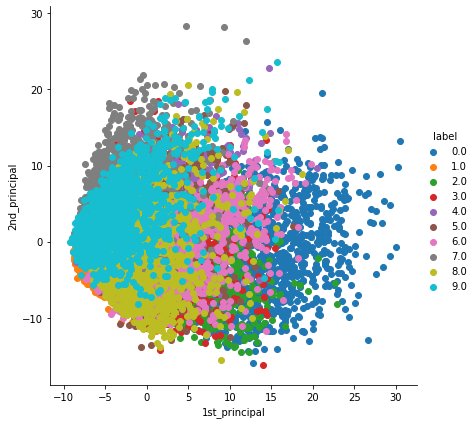

In [19]:
#Attaching the label for each 2-D datapoint
pca_data=np.vstack((pca_data.T,labels)).T

#Creating a new data frame which will be used to plot the data
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
sn.FacetGrid(pca_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

#this figure is exactly the same as above except that it is rotated

# PCA for dimensionality reduction(Not for Visualization)

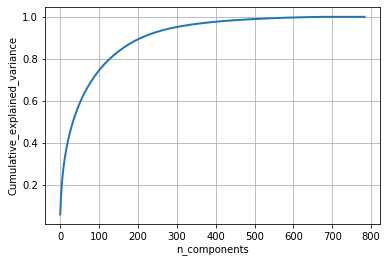

In [20]:
pca.n_components=784
pca_data=pca.fit_transform(sample_data)

percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)

cum_var_explained=np.cumsum(percentage_var_explained)

#plot the PCA spectrum
plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

#If we take 200 Dimensions, approximately 90% of variance is explained
#X-axis is number of components
#Y-axis is cumulative variance
#As per the graph-- if we go from 784 D -->100 D. We will have roughly 0.75 i.e. 75% variance i.e information from original data
#If we want 90% variance, that will be 200 D

# t-SNE using Scikit-learn on 1000 data points

C:\Users\vedav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


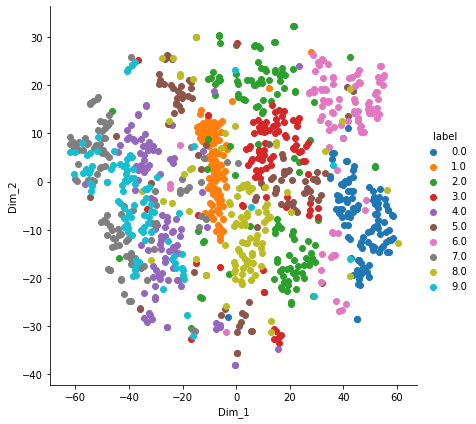

In [23]:
from sklearn.manifold import TSNE

#Pick top 1000 points as t-SNE takes longer time on 15000 points
data_1000 = standardized_data[0:1000,:]
labels_1000=labels[0:1000]

model=TSNE(n_components=2,random_state=0)
#setting random_state=0 or some number we ensure we get consistent results when we execute the next time
#if we do not set a value to random_state, running t-SNE on same dataset different times will yield different results
#default_perplexity=30
#default learning rate=200
#default Maximum number of iterations for optimization=1000

tsne_data=model.fit_transform(data_1000)

#combine t-SNE data with label data
#create a dataframe
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

#Plot t-SNE result
sn.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2',).add_legend()
plt.title("with default values,perplexity=30,learning rate=200,iterations=1000")
plt.show()


C:\Users\vedav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


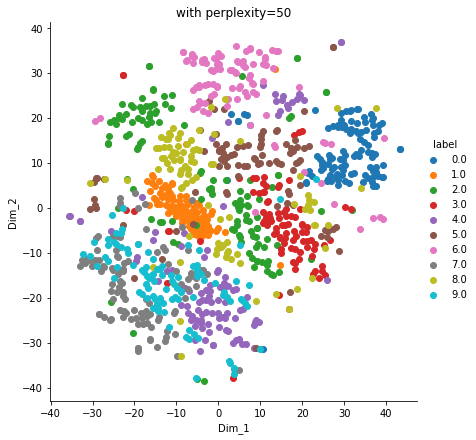

In [26]:
#Change the perplexity to 50
model=TSNE(n_components=2,random_state=0,perplexity=50)
tsne_data=model.fit_transform(data_1000)

#creating a new dataframe
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

#plot the results
sn.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title("with perplexity=50")
plt.show()

#The currents results are similar to results of perplexity=30

C:\Users\vedav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


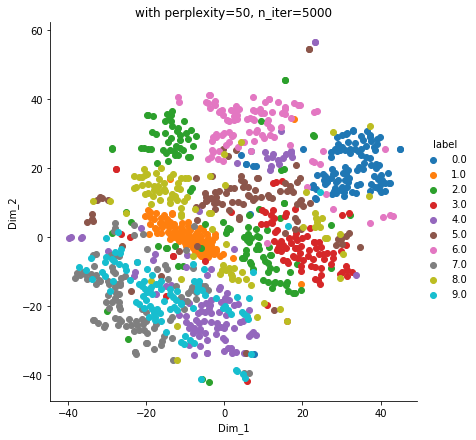

In [27]:
#t-SNE with perplexity=50 and iterations=5000
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data=model.fit_transform(data_1000)

#creating a new dataframe
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

#plot the results
sn.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title("with perplexity=50, n_iter=5000")
plt.show()

#The currents results are similar to results of perplexity=30

C:\Users\vedav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


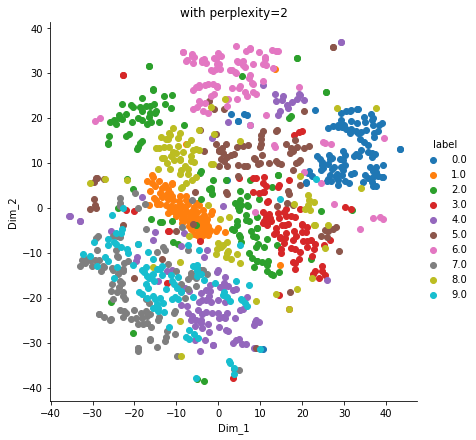

In [28]:
#t-SNE with perplexity=2
model=TSNE(n_components=2,random_state=0,perplexity=50)
tsne_data=model.fit_transform(data_1000)

#creating a new dataframe
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

#plot the results
sn.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title("with perplexity=2")
plt.show()

#We lost all the information

# t-SNE for all the 42000 points

C:\Users\vedav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


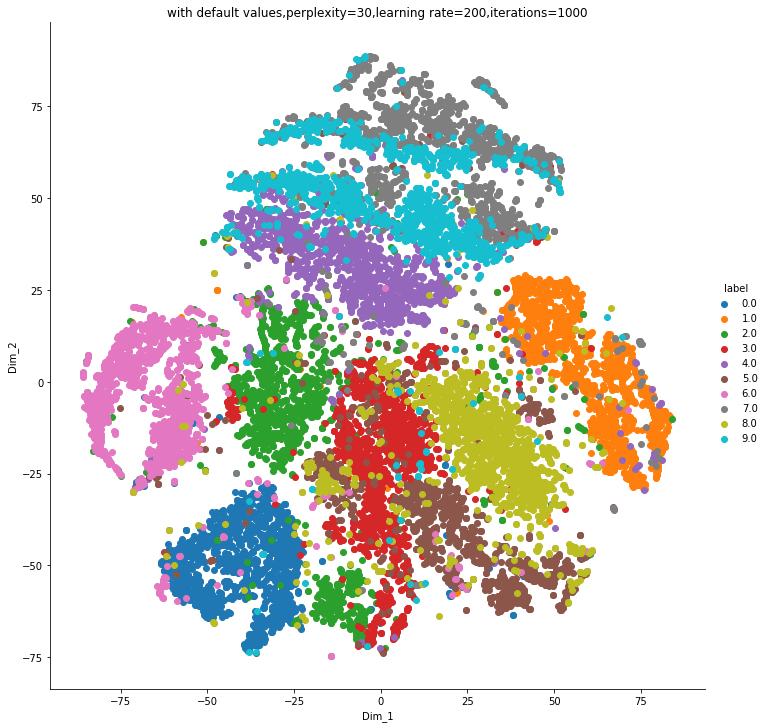

In [30]:
from sklearn.manifold import TSNE

data_42000 = standardized_data[0:42000,:]
labels_42000=labels

model=TSNE(n_components=2,random_state=0)
#setting random_state=0 or some number we ensure we get consistent results when we execute the next time
#if we do not set a value to random_state, running t-SNE on same dataset different times will yield different results
#default_perplexity=30
#default learning rate=200
#default Maximum number of iterations for optimization=1000

tsne_data=model.fit_transform(data_42000)

#combine t-SNE data with label data
#create a dataframe
tsne_data=np.vstack((tsne_data.T,labels_42000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

#Plot t-SNE result
sn.FacetGrid(tsne_df,hue="label",size=10).map(plt.scatter,'Dim_1','Dim_2',).add_legend()
plt.title("with default values,perplexity=30,learning rate=200,iterations=1000")
plt.show()

#This plot took 15 minutes